In [2]:
 For this assignment, our primary objective is to conduct the test analysis for the final document.
 As data preparation has already been completed in the previous assignment, we will focus less on this aspect.
 However, it's important to note that the data and key features will be uploaded to facilitate the assignment process smoothly. 
 This allows us to delve directly into the analysis phase, ensuring a comprehensive and insightful final document.
  

In [1]:
# load the data
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from io import StringIO  
from IPython.display import Image  
import pydotplus
import pydot
from sklearn.tree import plot_tree, export_text
from sklearn import preprocessing
from sklearn.metrics import precision_recall_curve
from sklearn import utils
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from joblib import *

import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
fig = plt.figure(figsize=(12,10))

<Figure size 1200x1000 with 0 Axes>

In [2]:
# Upload the data
data11 = pd.read_csv('AmazonSales1.csv',low_memory=False)

In [3]:
data11.head()

,index,Date,Status,FulfilmentB,Fulfilment,Fulfilment_dum,Category,Size,Qty,currency,Amount,ship-city,ship-postal-code,ship-country,fulfilled-by
0,4,4/30/2022,Shipped,Merchant,Amazon,1,Top,3XL,1,INR,574.0,CHENNAI,600073.0,IN,NaN
1,8,4/30/2022,Cancelled,Merchant,Amazon,1,Set,3XL,0,NaN,NaN,HYDERABAD,500008.0,IN,NaN
2,20,4/30/2022,Shipped,Amazon,Amazon,1,kurta,3XL,1,INR,517.0,TIRUCHIRAPPALLI,620018.0,IN,NaN
3,41,4/30/2022,Shipped,Merchant,Amazon,1,Western Dress,3XL,1,INR,885.0,JABALPUR,482002.0,IN,NaN
4,69,4/30/2022,Shipped,Amazon,Amazon,1,Set,3XL,1,INR,1146.0,VIJAPURA,586201.0,IN,NaN


In [4]:
data11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             128975 non-null  int64  
 1   Date              128975 non-null  object 
 2   Status            128975 non-null  object 
 3   FulfilmentB       128975 non-null  object 
 4   Fulfilment        128975 non-null  object 
 5   Fulfilment_dum    128975 non-null  int64  
 6   Category          128975 non-null  object 
 7   Size              128975 non-null  object 
 8   Qty               128975 non-null  int64  
 9   currency          121180 non-null  object 
 10  Amount            121180 non-null  float64
 11  ship-city         128942 non-null  object 
 12  ship-postal-code  128942 non-null  float64
 13  ship-country      128942 non-null  object 
 14  fulfilled-by      39277 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 14.8+ MB


In [5]:
data11.dtypes

index                 int64
Date                 object
Status               object
FulfilmentB          object
Fulfilment           object
Fulfilment_dum        int64
Category             object
Size                 object
Qty                   int64
currency             object
Amount              float64
ship-city            object
ship-postal-code    float64
ship-country         object
fulfilled-by         object
dtype: object

In [6]:
data11.isnull().sum()

index                   0
Date                    0
Status                  0
FulfilmentB             0
Fulfilment              0
Fulfilment_dum          0
Category                0
Size                    0
Qty                     0
currency             7795
Amount               7795
ship-city              33
ship-postal-code       33
ship-country           33
fulfilled-by        89698
dtype: int64

In [7]:
data11 = data11.dropna()
data11.head()

,index,Date,Status,FulfilmentB,Fulfilment,Fulfilment_dum,Category,Size,Qty,currency,Amount,ship-city,ship-postal-code,ship-country,fulfilled-by
89698,1,4/30/2022,Shipped - Delivered to Buyer,Amazon,Merchant,0,kurta,3XL,1,INR,406.0,BENGALURU,560085.0,IN,Easy Ship
89699,26,4/30/2022,Shipped - Delivered to Buyer,Amazon,Merchant,0,kurta,3XL,1,INR,299.0,BILASPUR,495001.0,IN,Easy Ship
89701,85,4/30/2022,Shipped - Delivered to Buyer,Amazon,Merchant,0,Bottom,3XL,1,INR,377.0,KOLKATA,700078.0,IN,Easy Ship
89702,92,4/30/2022,Shipped - Delivered to Buyer,Amazon,Merchant,0,kurta,3XL,1,INR,725.0,CHENNAI,600028.0,IN,Easy Ship
89703,129,4/30/2022,Shipped - Delivered to Buyer,Amazon,Merchant,0,kurta,3XL,1,INR,579.0,BENGALURU,560055.0,IN,Easy Ship


In [8]:
# Let's dropped variables " Fulfilment and Fulfilment_dum created from the Excell file
#data.drop(['Fulfilment','Fulfilment_dum'], axis=1, inplace=True)
#data22.drop(['Date','Fulfilment','Fulfilment_dum','currency','ship-city','ship-country','fulfilled-by'], axis=1, inplace=True)
data11.drop(['Date','Fulfilment','Fulfilment_dum','currency','ship-city','ship-country','fulfilled-by'], axis=1, inplace=True)
data11.head()

,index,Status,FulfilmentB,Category,Size,Qty,Amount,ship-postal-code
89698,1,Shipped - Delivered to Buyer,Amazon,kurta,3XL,1,406.0,560085.0
89699,26,Shipped - Delivered to Buyer,Amazon,kurta,3XL,1,299.0,495001.0
89701,85,Shipped - Delivered to Buyer,Amazon,Bottom,3XL,1,377.0,700078.0
89702,92,Shipped - Delivered to Buyer,Amazon,kurta,3XL,1,725.0,600028.0
89703,129,Shipped - Delivered to Buyer,Amazon,kurta,3XL,1,579.0,560055.0


In [9]:
# Cleaning, transforming and visualizing
# Check out the column names
data11.columns

Index(['index', 'Status', 'FulfilmentB', 'Category', 'Size', 'Qty', 'Amount',
       'ship-postal-code'],
      dtype='object')

In [11]:
#Check for duplicated rows
duplicateRowsDF = data11[data11.duplicated()]
duplicateRowsDF

,index,Status,FulfilmentB,Category,Size,Qty,Amount,ship-postal-code


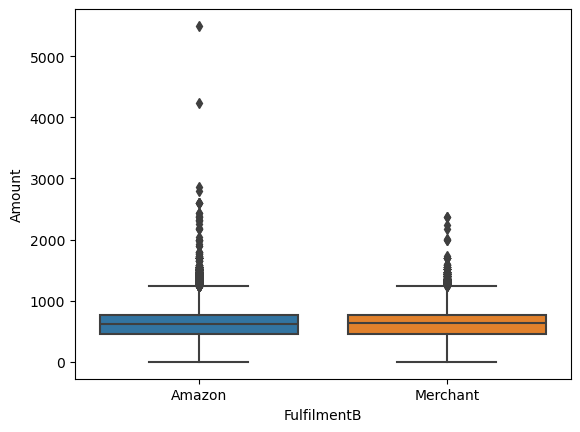

In [12]:
# Exploring our new NOPrediction dataset
# Make a boxplot on NOPrediction where the x axis is Decision, and the y axis is spent_last_week
_ = sns.boxplot(x='FulfilmentB', y='Amount', data=data11)

In [15]:
q_low = data11["Amount"].quantile(0.01)
q_hi  = data11["Amount"].quantile(0.99)

data11_filtered = data11[(data11["Amount"] < q_hi) & (data11["Amount"] > q_low)]


In [ ]:
# Exploring our new NOPrediction dataset
# Make a boxplot on NOPrediction where the x axis is Decision, and the y axis is spent_last_week
_ = sns.boxplot(x='FulfilmentB', y='Amount', data=data11)

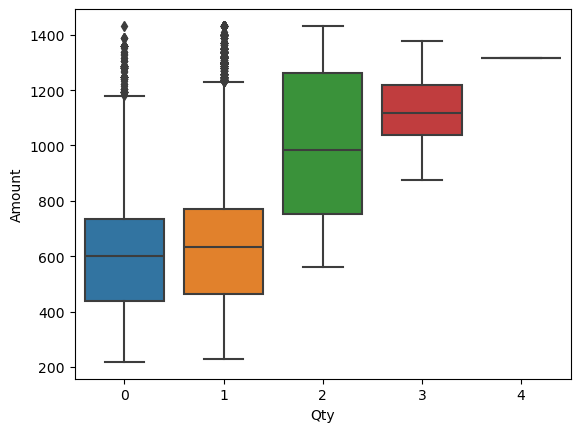

In [21]:
# Exploring our new NOPrediction dataset
# Make a boxplot on NOPrediction where the x axis is Decision, and the y axis is spent_last_week
_ = sns.boxplot(x='Qty', y='Amount', data=data11_filtered)

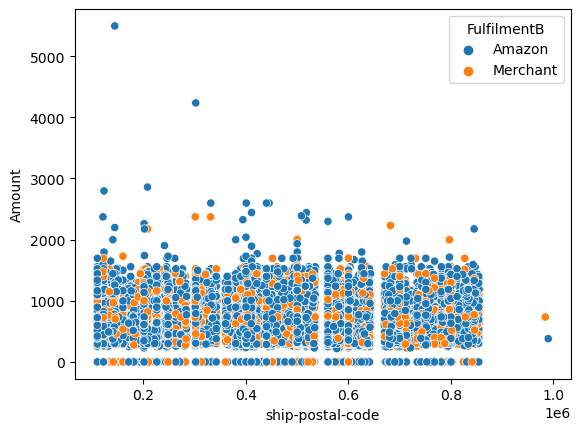

In [248]:
# Make a scatterplot on NOPrediction, where x is distance, y is spent_last_month and hue is Decision 
_ = sns.scatterplot(x='ship-postal-code', y='Amount', data=data11, hue='FulfilmentB')

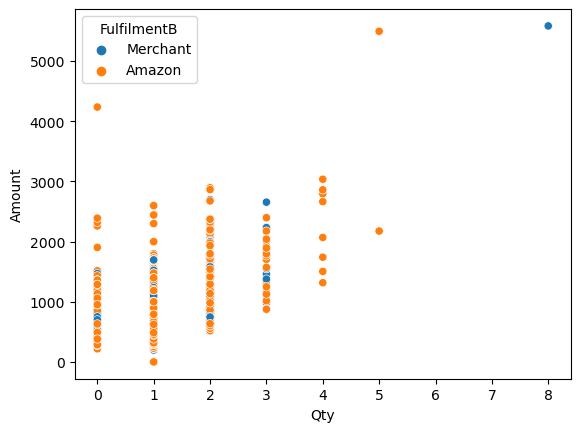

In [49]:
# Make a scatterplot on NOPrediction, where x is distance, y is spent_last_month and hue is Decision 
_ = sns.scatterplot(x='Qty', y='Amount', data=data11, hue='FulfilmentB')

In [22]:
# Print the categorical columns and their associated levels.
dfo = data11.select_dtypes(include=['object'], exclude=['datetime'])
dfo.shape
#get levels for all variables
vn = pd.DataFrame(dfo.nunique()).reset_index()
vn.columns = ['VarName', 'LevelsCount']
vn.sort_values(by='LevelsCount', ascending =False)
vn

,VarName,LevelsCount
0,Status,11
1,FulfilmentB,2
2,Category,8
3,Size,11


In [23]:
# Replace Fulfilment "Amazon and Merchant"  by 1 and 0
data11.loc[data11['FulfilmentB'] == 'Amazon','FulfilmentB'] =   1
data11.loc[data11['FulfilmentB'] == 'Merchant', 'FulfilmentB'] = 0
data11.head()

,index,Status,FulfilmentB,Category,Size,Qty,Amount,ship-postal-code
89698,1,Shipped - Delivered to Buyer,1,kurta,3XL,1,406.0,560085.0
89699,26,Shipped - Delivered to Buyer,1,kurta,3XL,1,299.0,495001.0
89701,85,Shipped - Delivered to Buyer,1,Bottom,3XL,1,377.0,700078.0
89702,92,Shipped - Delivered to Buyer,1,kurta,3XL,1,725.0,600028.0
89703,129,Shipped - Delivered to Buyer,1,kurta,3XL,1,579.0,560055.0


In [24]:
# Create dummies features for the categorical variables.
#features=['Status','Category','Size']
#dummies=pd.get_dummies(data22[features])
#merged=pd.concat([data22,dummies],axis=1)
#final=merged.drop(['Status','Category','Size'], axis=1)

features = ['Status', 'Category', 'Size']
dummies = pd.get_dummies(data11[features], dtype=int)
merged = pd.concat([data11, dummies], axis=1)
final2 = merged.drop(['Status', 'Category', 'Size'], axis=1)
data11 = final2
data11.head()

,index,FulfilmentB,Qty,Amount,ship-postal-code,Status_Cancelled,Status_Pending,Status_Pending - Waiting for Pick Up,Status_Shipped - Damaged,Status_Shipped - Delivered to Buyer,...,Size_4XL,Size_5XL,Size_6XL,Size_Free,Size_L,Size_M,Size_S,Size_XL,Size_XS,Size_XXL
89698,1,1,1,406.0,560085.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
89699,26,1,1,299.0,495001.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
89701,85,1,1,377.0,700078.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
89702,92,1,1,725.0,600028.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
89703,129,1,1,579.0,560055.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [25]:
data11['FulfilmentB'] = pd.to_numeric(data11['FulfilmentB'])

In [26]:
data11.shape

(37528, 35)

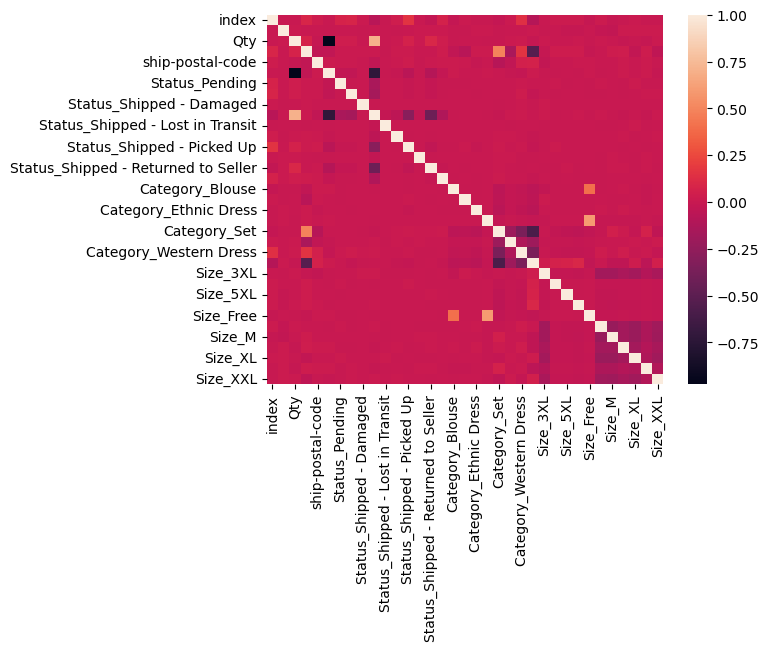

In [27]:
# Make a heatmap of the data 
correlation_matrix = data11.corr()
_ = sns.heatmap(correlation_matrix)

In [ ]:
# Making a multiple linear regression model 

In [28]:

# Create test and train datasets
# This is again very similar, but now we include more columns in the predictors
# Include all columns from data in the explanatory variables X except fixed.acidity and quality (which was an integer)
# X = df.drop(['fixed.acidity','quality'], axis=1)
X = data11.drop(['Amount'], axis=1)
y = data11['Amount']

# Create constants for X, so the model knows its bounds
X = sm.add_constant(X)


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [29]:
# We can use almost identical code to create the third model, because it is the same algorithm, just different inputs
# Create the model
#model3 = sm.OLS(y_train, X_train)
rmodel3 = sm.OLS(y.astype(float), X.astype(int)).fit()
# Fit the model
#rModel3 = model3.fit()

In [331]:
rmodel3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Amount   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     877.2
Date:                Mon, 01 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:05:28   Log-Likelihood:            -2.5448e+05
No. Observations:               37528   AIC:                         5.090e+05
Df Residuals:                   37496   BIC:                         5.093e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   99.4275     20.653      4.814      0.000      58.947     139.907
index                                    0.0003   3.09e-05     10.553      0.000       0.000       0.000
FulfilmentB                              6.2065      2.502      2.481      0.013       1.303      11.110
Qty                                    615.3913     13.948     44.119      0.000     588.052     642.731
ship-postal-code                      6.145e-07   5.71e-06      0.108      0.914   -1.06e-05    1.18e-05
Status_Cancelled                       534.1980     24.156     22.114      0.000     486.851     581.545
Status_Pending                         -64.7887     24.405     -2.655      0.008    -112.622     -16.955
Status_Pending - Waiting for Pick Up   -68.5640     23.971     -2.860      0.004    -115.548     -21.580
Status_Shipped - Damaged               326.3207    195.551      1.669      0.095     -56.965     709.607
Status_Shipped - Delivered to Buyer    -59.8126     21.000     -2.848      0.004    -100.973     -18.652
Status_Shipped - Lost in Transit      -306.4537     89.441     -3.426      0.001    -481.761    -131.147
Status_Shipped - Out for Delivery       -9.0364     38.992     -0.232      0.817     -85.461      67.388
Status_Shipped - Picked Up             -61.0580     21.885     -2.790      0.005    -103.954     -18.163
Status_Shipped - Rejected by Buyer     -82.6562     62.258     -1.328      0.184    -204.684      39.372
Status_Shipped - Returned to Seller    -61.5570     21.439     -2.871      0.004    -103.578     -19.536
Status_Shipped - Returning to Seller   -47.1645     26.516     -1.779      0.075     -99.137       4.808
Category_Blouse                        -67.3433     14.088     -4.780      0.000     -94.955     -39.731
Category_Bottom                       -279.1002     15.790    -17.676      0.000    -310.049    -248.151
Category_Ethnic Dress                   81.7237     13.266      6.161      0.000      55.723     107.725
Category_Saree                         348.5675     44.010      7.920      0.000     262.307     434.828
Category_Set                           203.2437      7.716     26.339      0.000     188.119     218.368
Category_Top                          -126.7491      8.449    -15.001      0.000    -143.310    -110.188
Category_Western Dress                 116.9786      7.922     14.766      0.000     101.451     132.506
Category_kurta                        -177.8934      7.731    -23.010      0.000    -193.047    -162.740
Size_3XL                               -55.9396      5.428    -10.307      0.000     -66.578     -45.301
Size_4XL                               242.4940     19.650     12.341      0.000     203.979     281.009
Size_5XL                              

In [95]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.004016057160722841


In [ ]:
/* The  above R-Squared coefficient , which is the "coefficient of determination" shows the model has poorly predict the variation in the dataset. 
 The R-squared of 42%, implying that's more work need to be done. */

In [332]:
# Use our new model to make predictions
y_pred = rmodel3.predict(X_test)

Text(0, 0.5, 'Predicted Amount')

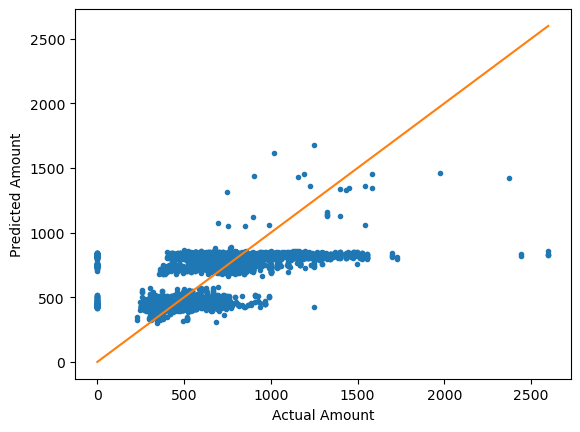

In [333]:
# Plot the predictions
# Build a scatterplot
plt.plot(y_test, y_pred, marker='.', linestyle='none')

# Add a line for perfect correlation
test_range = [min(y_test), max(y_test)]
plt.plot(test_range, test_range)

# Label it nicely
plt.xlabel('Actual Amount')
plt.ylabel('Predicted Amount')

In [ ]:
Base on this grapgh, multi linear model appears not to be a good fit for the data. Now, Let's check the data using a random forest model

In [ ]:
                # Making the Random Forest Model

In [35]:

from sklearn.model_selection import train_test_split

# dont forget to define your X and y
X= data11.drop(['FulfilmentB'],axis=1)
y=data11['FulfilmentB']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
y=y.astype('int')
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [36]:
#Create dummy variables to deal with categorical inputs
# One-hot encode all features in X.
X_train = pd.get_dummies(X_train)
#X_train = X_train.as_matrix()
# Do the same, but for X_test
X_test = pd.get_dummies(X_test) 
#X_test = X_test.as_matrix()

In [37]:
#Scale data to prep for model creation
#scale data
#from sklearn import preprocessing
#import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [109]:
#Fit Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
#f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))
print('Random Fores: ConfusionMatrix', cm)

Random Forest: Accuracy=0.692
Random Forest: f1-score=0.812
Random Fores: ConfusionMatrix [[ 197 1810]
 [ 504 4995]]


In [39]:
# Plug in appropriate max_depth and random_state parameters 
RFModel = RandomForestClassifier(max_depth=3, random_state=1234)

# Model and fit
RFModel.fit(X_train, y_train)
y_pred = RFModel.predict(X_test)
print('Random Forest model - max depth 3')
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Random Forest model - max depth 3
Accuracy: 0.7326139088729017
Balanced accuracy: 0.5
Precision score 0.7326139088729017
Recall score 0.0


In [ ]:
The R-squared from the Random forest shows a big improvement with regards to the one from the multilinear model. 
Let's now, use the tree model for model comparison.

In [45]:
# Logistic Regression



In [52]:
# Train/Split the data
X = data11.drop(['FulfilmentB'], axis=1)
y = data11['FulfilmentB']

# Create constants for X, so the model knows its bounds
X = sm.add_constant(X)

# Train/Slpit the data 
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y, random_state = 2)
print('Training split has ', Xlr.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.', 
      '(' + str(len(ylr))+ ')')
print('Test split has ', Xtestlr.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.', 
      '(' + str(len(ytestlr)) + ')')

Training split has  28146  rows
 and the corresponding labels have an equal number of values. (28146)
Test split has  9382  rows
 and the corresponding labels have an equal number of values. (9382)


In [57]:
clf = LogisticRegression(solver = 'newton-cg', max_iter = 500)

In [58]:
clf.fit(Xlrstrat, ylrstrat) 

C:\Users\sejad\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\sejad\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\sejad\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\sejad\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


LogisticRegression(max_iter=500, solver='newton-cg')

In [68]:
y_predict_test = clf.predict(Xtestlrstrat)
y_predict_training = clf.predict(Xlrstrat)
print("[Test] Accuracy score: (ytestlrstrat, y_predict_test) [**note reversed order]", 
      f'{accuracy_score(ytestlrstrat, y_predict_test):.2f}')

print("[Test] Accuracy score (y_predict_test, ytestlrstrat):",
      f'{accuracy_score(y_predict_test, ytestlrstrat):.2f}')
print("[Training] Accuracy score: (ylrstrat, y_predict_training)", 
      f'{accuracy_score(ylrstrat, y_predict_training):.2f}')

[Test] Accuracy score: (ytestlrstrat, y_predict_test) [**note reversed order] 0.74
[Test] Accuracy score (y_predict_test, ytestlrstrat): 0.74
[Training] Accuracy score: (ylrstrat, y_predict_training) 0.74


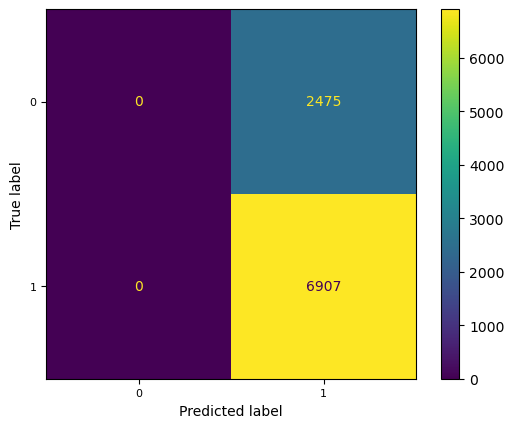

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(ytestlrstrat, y_predict_test, labels = clf.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = [0, 1])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = [1, 0], fontsize = 8)
ax.set_yticklabels(labels = [0, 1], fontsize = 8)
display_cm.plot(ax = ax)

In [ ]:
#Train/test split for the Tree Model
# As a reminder, here the dependent variable is (FulfilmentB) which is a binary variable.


In [74]:
# NoPrediction will contain all known values for the decision
# Call dropna() on coffeeData, and store the result in a variable NOPrediction 
# Call describe() on the Decision column of NoPrediction after calling dropna() on coffeeData
NoPrediction = data11.dropna()
NoPrediction['FulfilmentB'].describe().T

count    37528.000000
mean         0.736170
std          0.440714
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: FulfilmentB, dtype: float64

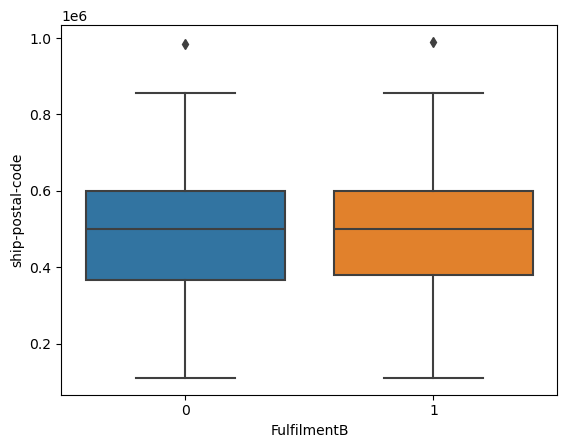

In [338]:
_ = sns.boxplot(x='FulfilmentB', y='ship-postal-code', data=NoPrediction)

In [ ]:
#Get the subset of Amazon Sales data with null values in the FulfilmentB column, and save that subset as Prediction

In [72]:
# Get just those rows whose value for the Decision column is null  
Prediction = data11[data11['FulfilmentB'].isnull()]


In [500]:
#Prediction.describe().T

In [75]:
# Divide the NOPrediction subset into X and y

# Check the names of the columns of NOPrediction
NoPrediction.columns

Index(['index', 'FulfilmentB', 'Qty', 'Amount', 'ship-postal-code',
       'Status_Cancelled', 'Status_Pending',
       'Status_Pending - Waiting for Pick Up', 'Status_Shipped - Damaged',
       'Status_Shipped - Delivered to Buyer',
       'Status_Shipped - Lost in Transit', 'Status_Shipped - Out for Delivery',
       'Status_Shipped - Picked Up', 'Status_Shipped - Rejected by Buyer',
       'Status_Shipped - Returned to Seller',
       'Status_Shipped - Returning to Seller', 'Category_Blouse',
       'Category_Bottom', 'Category_Ethnic Dress', 'Category_Saree',
       'Category_Set', 'Category_Top', 'Category_Western Dress',
       'Category_kurta', 'Size_3XL', 'Size_4XL', 'Size_5XL', 'Size_6XL',
       'Size_Free', 'Size_L', 'Size_M', 'Size_S', 'Size_XL', 'Size_XS',
       'Size_XXL'],
      dtype='object')

In [77]:
# Let's do our feature selection.
# Make a variable called 'features', and a list containing the strings of every column except "Decision"
features = [column for column in NoPrediction.columns if column != 'FulfilmentB']

# Make an explanatory variable called X, and assign it: NoPrediction[features]
X = NoPrediction[features] 

# Make a dependent variable called y, and assign it: NoPrediction.Decision
y = NoPrediction['FulfilmentB']

In [ ]:
# Modeling

In [78]:
# Declare a variable called entr_model and use tree.DecisionTreeClassifier. 
entr_model = tree.DecisionTreeClassifier(criterion='entropy', random_state=1234)

# Call fit() on entr_model
entr_model.fit(X_train, y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = entr_model.predict(X_test)

# Call Series on our y_pred variable with the following: pd.Series(y_pred)
y_pred = pd.Series(y_pred)

# Check out entr_model
entr_model

DecisionTreeClassifier(criterion='entropy', random_state=1234)

In [79]:
#Model 1: Entropy model - no max_depth: Interpretation and evaluation
# Run this block for model evaluation metrics 
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for 1' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Precision score for 0 ' , metrics.precision_score(y_test,y_pred, pos_label = 0))
print('Recall score for 1' , metrics.recall_score(y_test,y_pred, pos_label = 1))
print('Recall score for 0' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Model Entropy - no max depth
Accuracy: 0.612443378630429
Balanced accuracy: 0.5106917115790315
Precision score for 1 0.7384020618556701
Precision score for 0  0.28254580520732886
Recall score for 1 0.729405346426623
Recall score for 0 0.29197807673143994


In [ ]:
#Model 2: Gini impurity model - no max_depth


In [80]:
# Make a variable called gini_model, and assign it exactly what you assigned entr_model with above, but with the
# criterion changed to 'gini'
gini_model =  tree.DecisionTreeClassifier(criterion='gini', random_state=1234)

# Call fit() on the gini_model as you did with the entr_model
gini_model.fit(X_train, y_train) 

# Call predict() on the gini_model as you did with the entr_model 
y_pred = gini_model.predict(X_test) 

# Turn y_pred into a series, as before
y_pred = pd.Series(y_pred)

# Check out gini_model
gini_model

DecisionTreeClassifier(random_state=1234)

In [81]:
# Run this block for model evaluation
print("Model Gini impurity model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Model Gini impurity model
Accuracy: 0.6053823607780442
Balanced accuracy: 0.5006519734122062
Precision score 0.7329660238751148
Recall score 0.27553562531141007


In [ ]:
The accuracy  haas slightly decreased

In [ ]:
# Model 3: Entropy model - max depth 3

In [82]:
# Made a model as before, but call it entr_model2, and make the max_depth parameter equal to 3. 
# Execute the fitting, predicting, and Series operations as before
# Made a model as before, but call it entr_model2, and make the max_depth parameter equal to 3. 
# Execute the fitting, predicting, and Series operations as before
entr_model2 = tree.DecisionTreeClassifier(criterion='entropy', random_state=1234, max_depth=3)

entr_model2.fit(X_train, y_train)
y_pred = entr_model2.predict(X_test)

y_pred = pd.Series(y_pred)

entr_model2

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1234)

In [83]:
# Run this block for model evaluation 
print("Model Entropy model max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for 1 ' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Recall score for 0' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Model Entropy model max depth 3
Accuracy: 0.7326139088729017
Balanced accuracy: 0.5
Precision score for 1  0.7326139088729017
Recall score for 0 0.0


In [ ]:
Big improvement has been observed from the accuracy (0.7340)

In [ ]:
# Model 4: Gini impurity model - max depth 3

In [84]:
# As before, make a variable, but call it gini_model2, and ensure the max_depth parameter is set to 3
# As before, make a variable, but call it gini_model2, and ensure the max_depth parameter is set to 3
gini_model2 = tree.DecisionTreeClassifier(criterion ='gini', random_state=1234, max_depth=3)

# Do the fit, predict, and series transformations as before. 
gini_model2.fit(X_train, y_train)

y_pred = gini_model2.predict(X_test)
y_pred = pd.Series(y_pred)

gini_model2

DecisionTreeClassifier(max_depth=3, random_state=1234)

In [85]:
print("Gini impurity  model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1 ))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Gini impurity  model - max depth 3
Accuracy: 0.7326139088729017
Balanced accuracy: 0.5
Precision score 0.7326139088729017
Recall score 0.0


In [ ]:
The accuracy remained the same ( 0.7340)

In [ ]:
# Evaluating 

In [114]:
Three models were evaluated on the dataset. The linear model showed less promising results with an R-squared of 42% and an R-score of less than 1%, 
indicating it is not a good fit for the dataset. Conversely, the regression models demonstrated more promising results
in terms of precision and F1-score, as illustrated below:

Random Forest: Accuracy=0.692
Random Forest: f1-score=0.812
Random Fores: ConfusionMatrix 
 [[ 197 1810]
 [ 504 4995]]

Random Forest model - max depth 3
Accuracy: 0.7326139088729017
Balanced accuracy: 0.5
Precision score 0.7326139088729017
Recall score 0.0

The model ( Random Forest with max depth 3) shows a slight improvement in accuracy compared to the version without implementing max depth, 
which is similar to the results obtained when testing with Logistic Regression. Here are the detailed results for further clarification:

 [Test] Accuracy score: (ytestlrstrat, y_predict_test) [**note reversed order] 0.74
 [Test] Accuracy score (y_predict_test, ytestlrstrat): 0.74
 [Training] Accuracy score: (ylrstrat, y_predict_training) 0.74

However, when testing with the Tree Model, the results demonstrate consistency across various applied tests. Here's a description of the findings:

Model Entropy - no max depth
Accuracy: 0.612443378630429
Balanced accuracy: 0.5106917115790315
Precision score for 1 0.7384020618556701
Precision score for 0  0.28254580520732886
Recall score for 1 0.729405346426623
Recall score for 0 0.29197807673143994

Model Gini impurity model
Accuracy: 0.6053823607780442
Balanced accuracy: 0.5006519734122062
Precision score 0.7329660238751148
Recall score 0.27553562531141007

Model Entropy model max depth 3
Accuracy: 0.7326139088729017
Balanced accuracy: 0.5
Precision score for 1  0.7326139088729017
Recall score for 0 0.0

Gini impurity  model - max depth 3
Accuracy: 0.7326139088729017
Balanced accuracy: 0.5
Precision score 0.7326139088729017
Recall score 0.0

Despite the similarity in accuracy scores across all models, the Random Forest model with a maximum depth of 3 emerges as a better fit. 
This is evidenced by an F1-score of over 80%, indicating a well-balanced performance.
This means the model can achieve high precision and high recall simultaneously when predicting Amazon Sales status. 